<a href="https://colab.research.google.com/github/rschabra/ENEE439Dlabs/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 3 - Summary of Paper

The paper "A Survey of Modern Deep Learning based Object Detection Models" discusses the major object detection methods for both single and two stage detectors as well as a historical view of these categories. This was created as previous studies lack a discussion around "new developments in the domain." This paper also discusses lightweight models as well as backbone architectures.

The paper's second section largely discusses the overall challenges object detection is facing. Specifically it talks about a few key issues in computer vision algorithms as well as the datasets these algorithms are used upon. Specifically, I would like to note two of the data sets that the authors discuss are the MS COCO dataset and the Google Open Image datasets. From the figure (figure 6) alone, one can see that there is a large issue with using just the MS COCO dataset - it trains on identifying humans extremely hard, but the frequency of other objects in the dataset is extremely low. Additionally, with Google's Open Image dataset, there is a large drop in the number of images "beyond the top-5 most frequent classes." This indicates a possibility creating a skew in the dataset and eventually a bias in the resulting model.

Next, the authors discuss some of the important technical revelations regarding backbone architectures used in modern detectors. Specifically, the authors dive into in-depth discussions regarding AlexNet - a CNN for image classifcation which broke records for its improved accuracy -, VGG - which used a large number of small Convolution filters to reduce network paramaters and converge sooner, - GoogleLeNet/Inception, ResNets, ResNeXt, CSPNNet, and EfficientNet - which may open the doors for many more technological breakthroughs in image processing efficiency.

Next, the paper begin discussing the Two Stage Detectors - R-CNN, SPP-Net, and Fast/er R-CNN.

R-CNN or Region-based Convolutional Neural Network uses a mean-subtracted input image, creating 2000 object candidates. This module of candidates is fed through a CNN and extracts a 4096 dimension feature vector for each propsoal. This is then passed to class SVMs and then scored. The author indicates that the creation of the R-CNN was extremely important in the field of object detection as it converted detection into classifcation.

However, it was slow.

SPP-Net used an SPP layer of an arbitrary size with a fixed input into a CNN. This was a large increase in efficiency with comparable accuracy. Though, since it used an architecture similar to the R-CNN, it still was troubled with a long training time.


Fast and Faster R-CNN used a single E2E trainable system. These were considerable increases in efficiency with the eventual time per image being 2.0 seconds with solid accuracy.

Eventually, Mask R-CNN was developed by extending on the Faster R-CNN. This used a second branch in parallel for pixel-level object instance segmentation. The loss function from the Faster R-CNN was updated with a Mask loss function and the eventual increase in efficiency was extremely close to real-time processing.

The authors then discuss one-stage detectors such as YOLO (You Only Look Once), Retina Net, and SSD (Single Shot Detector), which all use a CNN to both predict object classes as well as bounding boxes.

The paper also includes a section on a variety of Lightweight Networks including SqueezeNet, ShuffleNet, MobileNets, MobileNetv2, PeleeNet, ShuffleNetv2, MobileNetv3, MnasNet. Many of these relied on depthwise separable convolution. Eventually, MnasNet as well as MobileNetv3 used a Neural Architecture Seaerch approach that deeply improved upon accuracy of the network.

Finally, the author compares single and two stage detectors using performance data from each of the available models. Additionally, the author discusses future trends for object detection. Specifically, the use of AutoML, Lightweight Detectors, Weakly Supervised/few shot detection, Domain transfer, 3D object detection, and object detection in video.

The author believes that while object detection "has come a long way in the past decade," the best detectors in the present are not even close to perfect.

In [2]:
!pip3 install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1

# of Squares in the Image (approximately):  4
# of Diamonds in the Image (approximately):  0


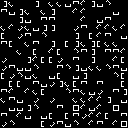

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow as show

# Load image
image = cv2.imread('/content/images/squares/Image5.png')
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define kernel for squares
square_kernel = np.array([
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1]
], dtype=np.uint8)
# Define kernel for diamonds
diamond_kernel = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
], dtype=np.uint8)

# Apply square kernel to detect squares
square = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, square_kernel)

# Apply diamond kernel to detect diamonds
diamond = cv2.morphologyEx(gray, cv2.MORPH_OPEN, diamond_kernel)

# Find contours in the square image to determine how many squares we have

# For both contours, we use chain approx simple which removes redundancy in finding points
# Additionally, we use RETR_external to remove any minimal cases and only find extremely correct matches.
squares, _ = cv2.findContours(square, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the diamond image to determine how many diamonds we have
diamonds, _ = cv2.findContours(diamond, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 12 was the average error found in testing
# The kernels also seem to be finding approximately 2 times as many squares as usual.
print("# of Squares in the Image (approximately): ", int(len(squares) - 40 - 3*len(diamonds)))
print("# of Diamonds in the Image (approximately): ", len(diamonds))

show(image)

Looks like our results are OK. Testing with many of the images previously led us to an offset of 0 for the diamonds and an offset factor of 40 - (3 * # of diamonds) for the squares. Lets test it on the diamonds data set as well.

# of Squares in the Image (approximately):  0
# of Diamonds in the Image (approximately):  3


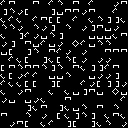

In [72]:
image = cv2.imread('/content/images/diamonds/Image1.png')
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define kernel for squares
square_kernel = np.array([
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1]
], dtype=np.uint8)

# Define kernel for diamonds
diamond_kernel = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
], dtype=np.uint8)


# Apply square kernel to detect squares
square = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, square_kernel)

# Apply diamond kernel to detect diamonds
diamond = cv2.morphologyEx(gray, cv2.MORPH_OPEN, diamond_kernel)

# Find contours in the square image to determine how many squares we have

# For both contours, we use chain approx simple which removes redundancy in finding points
# Additionally, we use RETR_external to remove any minimal cases and only find extremely correct matches.
squares, _ = cv2.findContours(square, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours in the diamond image to determine how many diamonds we have
diamonds, _ = cv2.findContours(diamond, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 12 was the average error found in testing
# The kernels also seem to be finding approximately 2 times as many squares as usual.
print("# of Squares in the Image (approximately): ", int(len(squares) - 40 - 3*len(diamonds)))
print("# of Diamonds in the Image (approximately): ", len(diamonds))

show(image)

The results look alright, but there is defintely a level of error that is not perfect. There should be one diamond in the image and not 3.

Any time there are less than 0 squares, or less than 0 diamonds, we treat that as a 0 in our results.

## Part 2

In [ ]:
from pycocotools.coco import COCO
import skimage.io as io
from matplotlib import pyplot as plt
import requests

coco = COCO('/content/annotations/instances_train2014.json')
imgIds = coco.getImgIds()
images = coco.loadImgs(imgIds)
catIds = coco.getCatIds(catNms=['person', 'car', 'dog', 'cat', 'chair'])

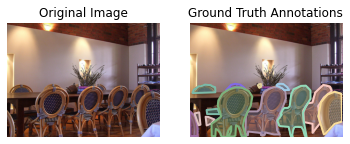

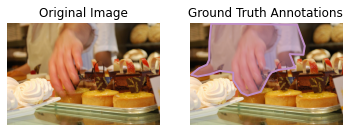

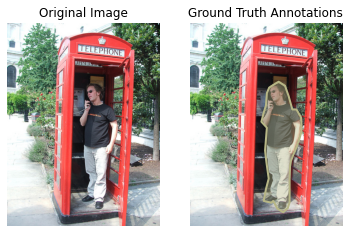

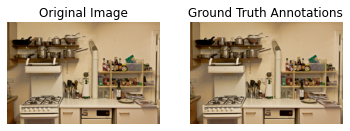

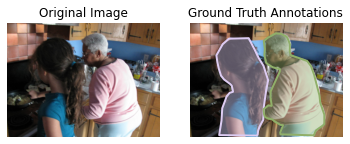

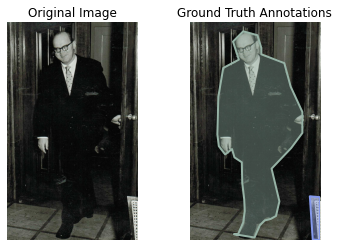

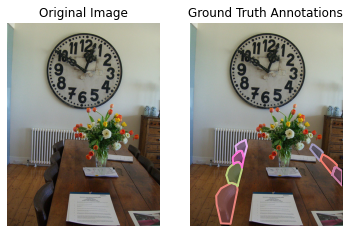

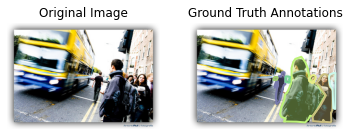

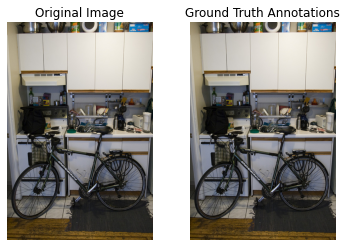

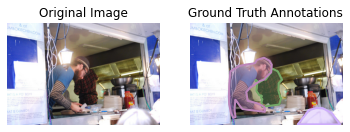

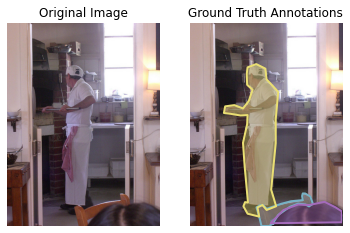

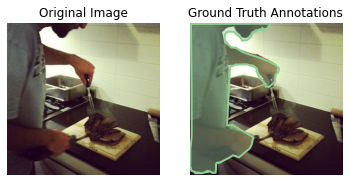

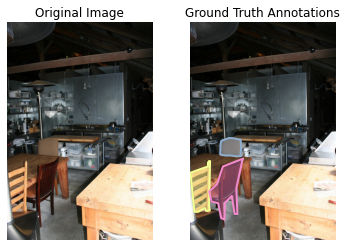

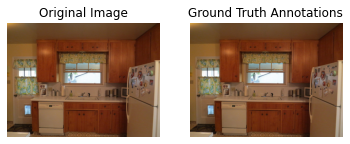

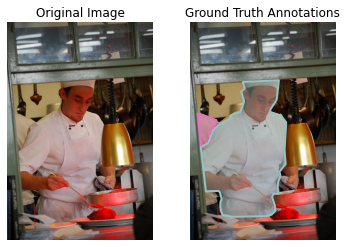

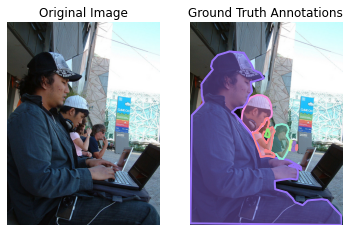

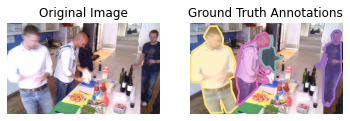

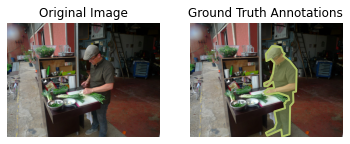

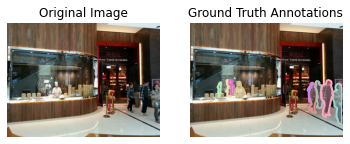

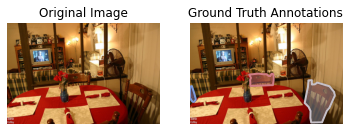

In [32]:
# Loop over 21 images, plot the images, ground truth annotations and object masks
for img_id in images[0:20]:
    # Load the image using the COCO API
    img_data = requests.get(img_id['coco_url']).content
    with open('/content/images/' + img_id['file_name'], 'wb') as handler:
      handler.write(img_data)
    I = io.imread(img_id['coco_url'])
    # Load the ground truth annotations using the COCO API
    annIds = coco.getAnnIds(imgIds=img_id['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    plt.subplot(1, 2, 2)
    plt.imshow(I)
    plt.axis('off')
    plt.title('Ground Truth Annotations')
    
    coco.showAnns(anns)
    plt.subplot (1, 2, 1)
    plt.imshow(I)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
